# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [9]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [11]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [12]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')


In [13]:
# Extract all tables of data
table = soup.find_all('table', class_='table')[0]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [15]:
#Extract all header
table_header = table.find_all('th')
header=[]
for title in table_header:
    header.append(title.text)
df= pd.DataFrame(columns=header)
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [20]:
#Extract all the row data
# Create an empty list
ids=[]
terrestrial_date=[]
sol = []
ls = []
month =[]
min_temp =[]
pressure_list =[]


rows = table.find_all('tr',class_='data-row')

 # Loop through the scraped data to create a list of rows
for row in rows:
    tds =[td.get_text() for td in row.find_all('td')]
    if len(tds) == 0:
         print(row)
    else:
         #find pressure
        pressure = tds.pop()
        pressure_list.append(pressure)
        #find min_temp
        min_t = tds.pop()
        min_temp.append(min_t)
        #find min_temp
        month_t = tds.pop()
        month.append(month_t)
        #find ls
        ls_t = tds.pop()
        ls.append(ls_t)
        #find sol
        sol_t = tds.pop()
        sol.append(sol_t)
        #find terrestrial_date
        t_date = tds.pop()
        terrestrial_date.append(t_date)
        #find ids
        ids_t = tds.pop()
        ids.append(ids_t)
     

In [24]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

# Calling DataFrame constructor after zipping
# both lists, with columns specified
df = pd.DataFrame((zip(ids,terrestrial_date,sol,ls,month,min_temp,pressure_list)),
               columns =header)

In [25]:
# Confirm DataFrame was created successfully
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [346]:
# Examine data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [26]:
# Change data types for data analysis
# convert data type of grade column 
# into appropriate datetime, int, or float data types.
from datetime import datetime
df.id = df.id.astype(int)
df['terrestrial_date'] =  pd.to_datetime(df['terrestrial_date'], format='%Y-%m-%d')
df.sol = df.sol.astype(int)
df.ls = df.ls.astype(int)
df.month = df.month.astype(int)
df.min_temp = df.min_temp.astype(float)
df.pressure = df.pressure.astype(float)

In [27]:
# Confirm type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [32]:
# 1. How many months are there on Mars?
# months= df["month"].value_counts()
# len(months)
##or second method
months= df["month"].nunique()
months

12

In [33]:
# 2. How many Martian days' worth of data are there?
Martian_days= df["sol"].value_counts()
Martian_days_count=len(Martian_days)
Martian_days_count

1867

In [34]:
# 3. What is the average low temperature by month?
avg_low_temp = df.groupby(['month'])["min_temp"].mean()
avg_low_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

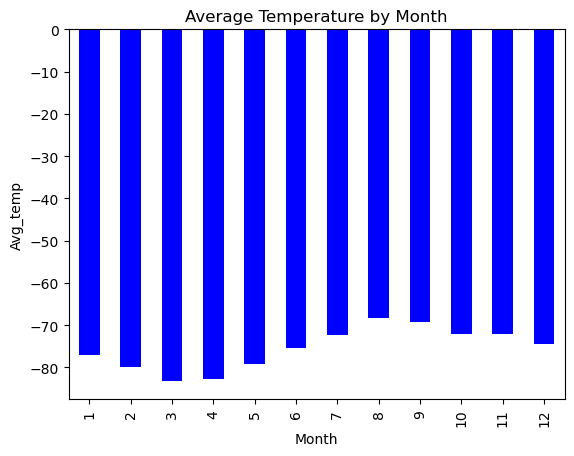

In [35]:
# Plot the average temperature by month

plot_pandas = avg_low_temp.plot.bar(color='b')
plt.xlabel("Month")
plt.ylabel("Avg_temp")
plt.title("Average Temperature by Month")
plt.show()

In [38]:
# Identify the coldest and hottest months in Curiosity's location
#On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest.

##coldest month
avg_low_temp[avg_low_temp==avg_low_temp.min()]

month
3   -83.307292
Name: min_temp, dtype: float64

In [39]:
##hottest month
avg_low_temp[avg_low_temp==avg_low_temp.max()]

month
8   -68.382979
Name: min_temp, dtype: float64

In [40]:
# 4. Average pressure by Martian month
avg_pressure = df.groupby(['month'])["pressure"].mean()
avg_pressure.sort_values()

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

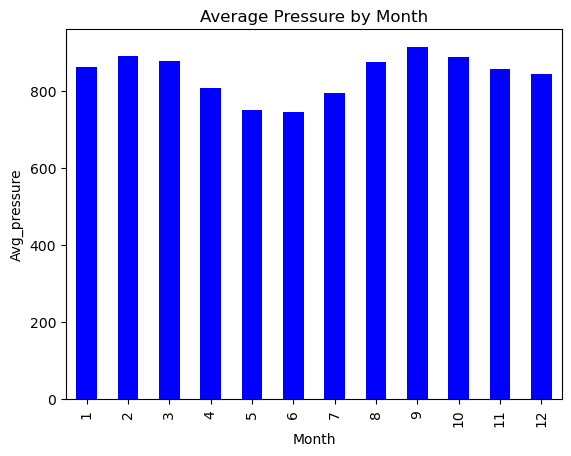

In [41]:
# Plot the average pressure by month
plot_pandas = avg_pressure.plot.bar(color='b')
plt.xlabel("Month")
plt.ylabel("Avg_pressure")
plt.title("Average Pressure by Month")
plt.show()

In [42]:
#Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.
#lowest pressure by month
avg_pressure[avg_pressure==avg_pressure.min()]

month
6    745.054422
Name: pressure, dtype: float64

In [44]:
#highest pressure by month
avg_pressure[avg_pressure==avg_pressure.max()]

month
9    913.30597
Name: pressure, dtype: float64

In [357]:
# 5. How many terrestrial (earth) days are there in a Martian year?

In [47]:
#finding the base sun longitude
base_longitude = df['ls'].loc[0]
base_longitude

155

In [48]:
# find more dates for base longitude
same_long = df.loc[df['ls']==base_longitude]
same_long

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [49]:
##From sol  peak to peak difference in dates 
#from 2012-08-16 sol= 10 to 2014-07-03 sol = 678  or 2014-07-03 sol = 679
#from first date to second date difference is 678-10= 668 days
#from third date to fourth date difference is 1346-679= 667 days
# so from sol Mars year is equivalent to 668 earth days.

In [87]:
##From ls 
#one martial year days
start= same_long['terrestrial_date'].loc[0]
year_later = same_long['terrestrial_date'].iloc[1]
one_martial_year = (year_later - start)
print(f'{one_martial_year} terrestrial (earth) days are there in a Martian year')

686 days 00:00:00 terrestrial (earth) days are there in a Martian year


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Text(0.5, 1.0, 'Daily minimum temperature')

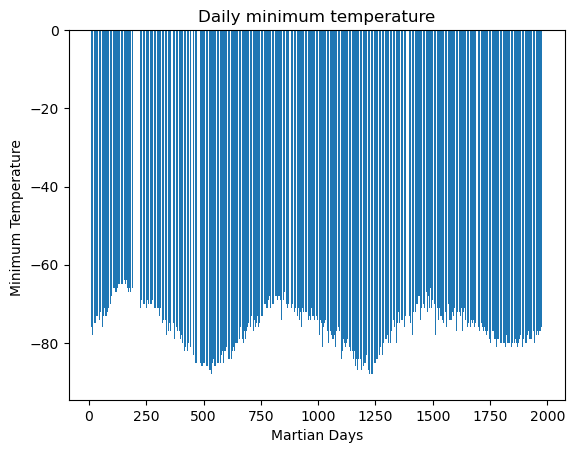

In [362]:
plt.bar(df['sol'],df['min_temp'])
# Create labels for the x and y axes.
plt.xlabel("Martian Days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily minimum temperature')

In [51]:
##How many terrestrial days exist in a Martian year? A visual estimate within 25% was made. 
#from visula we can estimate that in 2000 days martian complited 3 circle around sun.
# approximately 2000/3 = 667 terrestrial (earth) days are there in a Martian year 

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [52]:
# Write the data to a CSV
# Export file as a CSV, without the Pandas index, but with the header
df.to_csv("Untitled Folder/mars.csv",index=True,header=True)


In [53]:
browser.quit()